# import libraries

In [3]:
import pandas as pd
data=pd.read_csv("C:\\Users\\HP_OS 11\\Downloads\\credit_customers .csv")
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [4]:
data["checking_status"].unique()

array(['<0', '0<=X<200', 'no checking', nan, '>=200'], dtype=object)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         909 non-null    object
 1   duration                1000 non-null   int64 
 2   credit_history          961 non-null    object
 3   purpose                 957 non-null    object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          987 non-null    object
 6   employment              987 non-null    object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      942 non-null    object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 931 non-null    object
 15  exist

In [6]:
data.describe()


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [7]:
import numpy as np 
def count_per_classes(data,col) :
   
    output = data.groupby([col])['class'].value_counts().unstack()
    return display(output)

In [8]:
count_per_classes(data, 'checking_status')
# Did you notice anything?

class,bad,good
checking_status,,
0<=X<200,92,148
<0,125,125
>=200,12,46
no checking,43,318


##### the class is more good when the checking status is >=200 or between 0 and 200 but is the same whin it less than 0

In [9]:
data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [10]:
for i in data.columns:
    if i != "class":
        count_per_classes(data, i)


class,bad,good
checking_status,,
0<=X<200,92,148
<0,125,125
>=200,12,46
no checking,43,318


class,bad,good
duration,,
4,NaN,6.0
5,NaN,1.0
6,9.0,66.0
7,NaN,5.0
8,1.0,6.0
9,14.0,35.0
10,3.0,25.0
11,NaN,9.0
12,49.0,130.0


class,bad,good
credit_history,,
all paid,28,20
critical/other existing credit,49,231
delayed previously,26,57
existing paid,164,347
no credits/all paid,24,15


class,bad,good
purpose,,
business,33,60
domestic appliance,4,8
education,22,27
furniture/equipment,55,116
new car,82,138
other,5,7
radio/tv,62,211
repairs,7,14
retraining,1,8


class,bad,good
credit_amount,,
250,NaN,1.0
276,NaN,1.0
338,NaN,1.0
339,NaN,1.0
343,NaN,1.0
...,...,...
15653,NaN,1.0
15672,1.0,NaN
15857,NaN,1.0


class,bad,good
savings_status,,
100<=X<500,34,69
500<=X<1000,11,51
<100,214,377
>=1000,6,42
no known savings,32,151


class,bad,good
employment,,
1<=X<4,103,234
4<=X<7,39,135
<1,70,100
>=7,61,183
unemployed,23,39


class,bad,good
installment_commitment,,
1,34,102
2,62,169
3,45,112
4,159,317


class,bad,good
personal_status,,
female div/dep/mar,109,201
male div/sep,20,30
male mar/wid,25,67
male single,146,402


class,bad,good
other_parties,,
co applicant,18,23
guarantor,10,42
none,272,635


class,bad,good
residence_since,,
1,36,94
2,97,211
3,43,106
4,124,289


class,bad,good
property_magnitude,,
car,96,216
life insurance,67,155
no known property,63,82
real estate,55,208


class,bad,good
age,,
19,1.0,1.0
20,5.0,9.0
21,5.0,9.0
22,11.0,16.0
23,20.0,28.0
24,19.0,25.0
25,19.0,22.0
26,14.0,36.0
27,13.0,38.0


class,bad,good
other_payment_plans,,
bank,57,82
none,224,590
stores,19,28


class,bad,good
housing,,
for free,40,59
own,174,494
rent,65,99


class,bad,good
existing_credits,,
1,200,433
2,92,241
3,6,22
4,2,4


class,bad,good
job,,
high qualif/self emp/mgmt,51,97
skilled,186,444
unemp/unskilled non res,7,15
unskilled resident,56,144


class,bad,good
num_dependents,,
1,254,591
2,46,109


class,bad,good
own_telephone,,
none,187,409
yes,113,291


class,bad,good
foreign_worker,,
no,4,33
yes,296,667


##### duration when the duration increase it seems to be more good
##### credit historty all paid , no credits is more included in the bad class
##### age is a important feature as it seems young people are inclueded more in class good
##### foreign worker doesnt affect the target
##### own telephone having phone affect it which is includrd more in the good class
##### num_dependent affect it ,it is included more in the good class

<Axes: xlabel='checking_status', ylabel='count'>

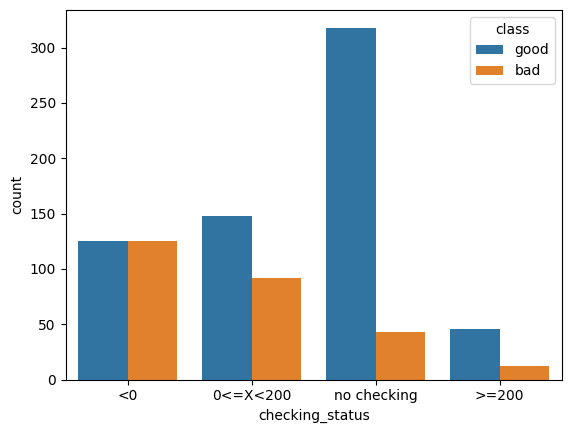

In [11]:
import seaborn as sns
sns.countplot(x='checking_status', hue='class', data=data)

<Axes: xlabel='class', ylabel='credit_amount'>

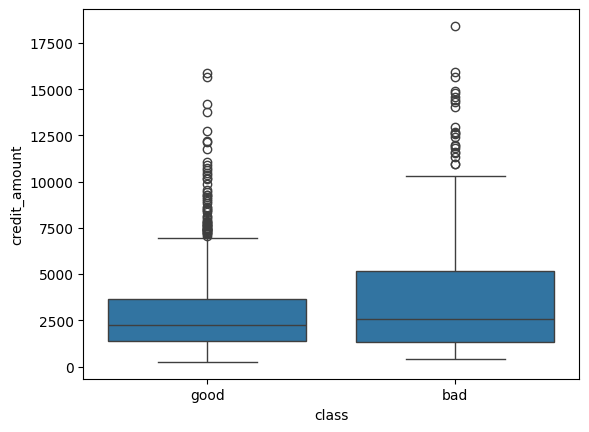

In [12]:
sns.boxplot(x='class', y='credit_amount', data=data)


<Axes: xlabel='age', ylabel='count'>

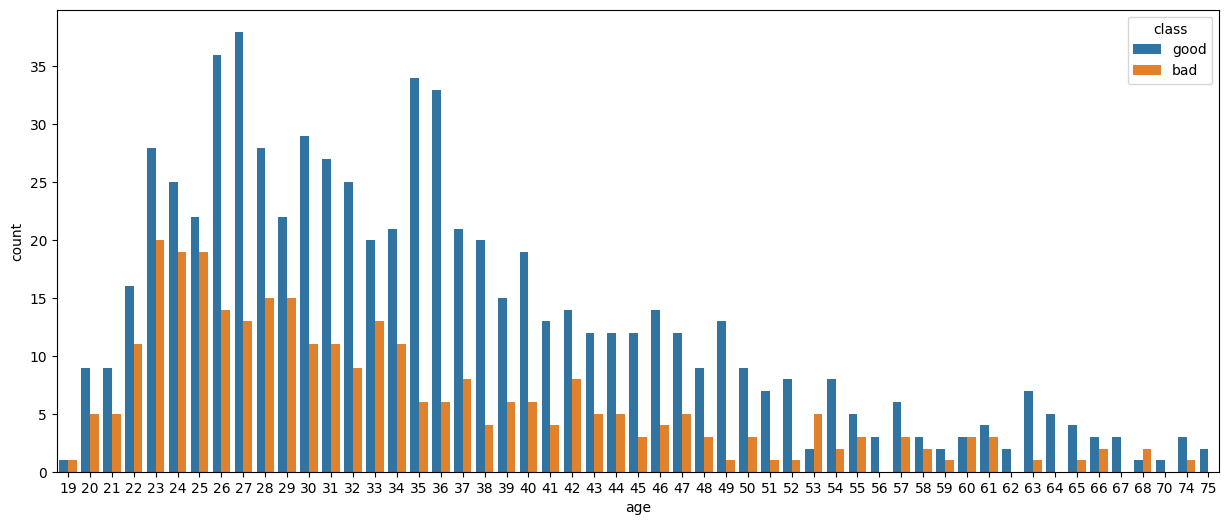

In [13]:
import matplotlib.pyplot as plt
# #Explore Numeric Features:
plt.figure(figsize=(15, 6))
sns.countplot(x='age', hue='class', data=data)

<Axes: xlabel='age', ylabel='Density'>

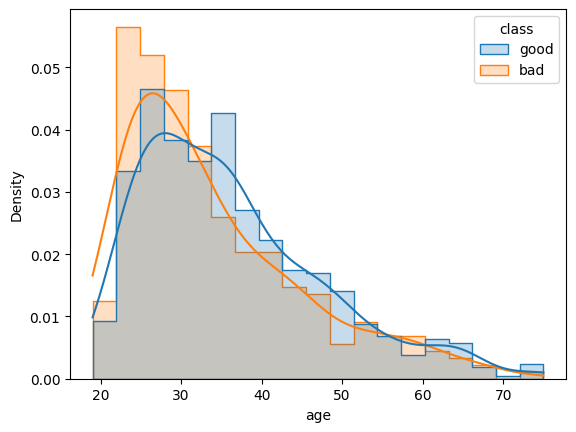

In [14]:
sns.histplot(data=data, x='age', hue='class', element='step', common_norm=False, stat='density', kde=True)


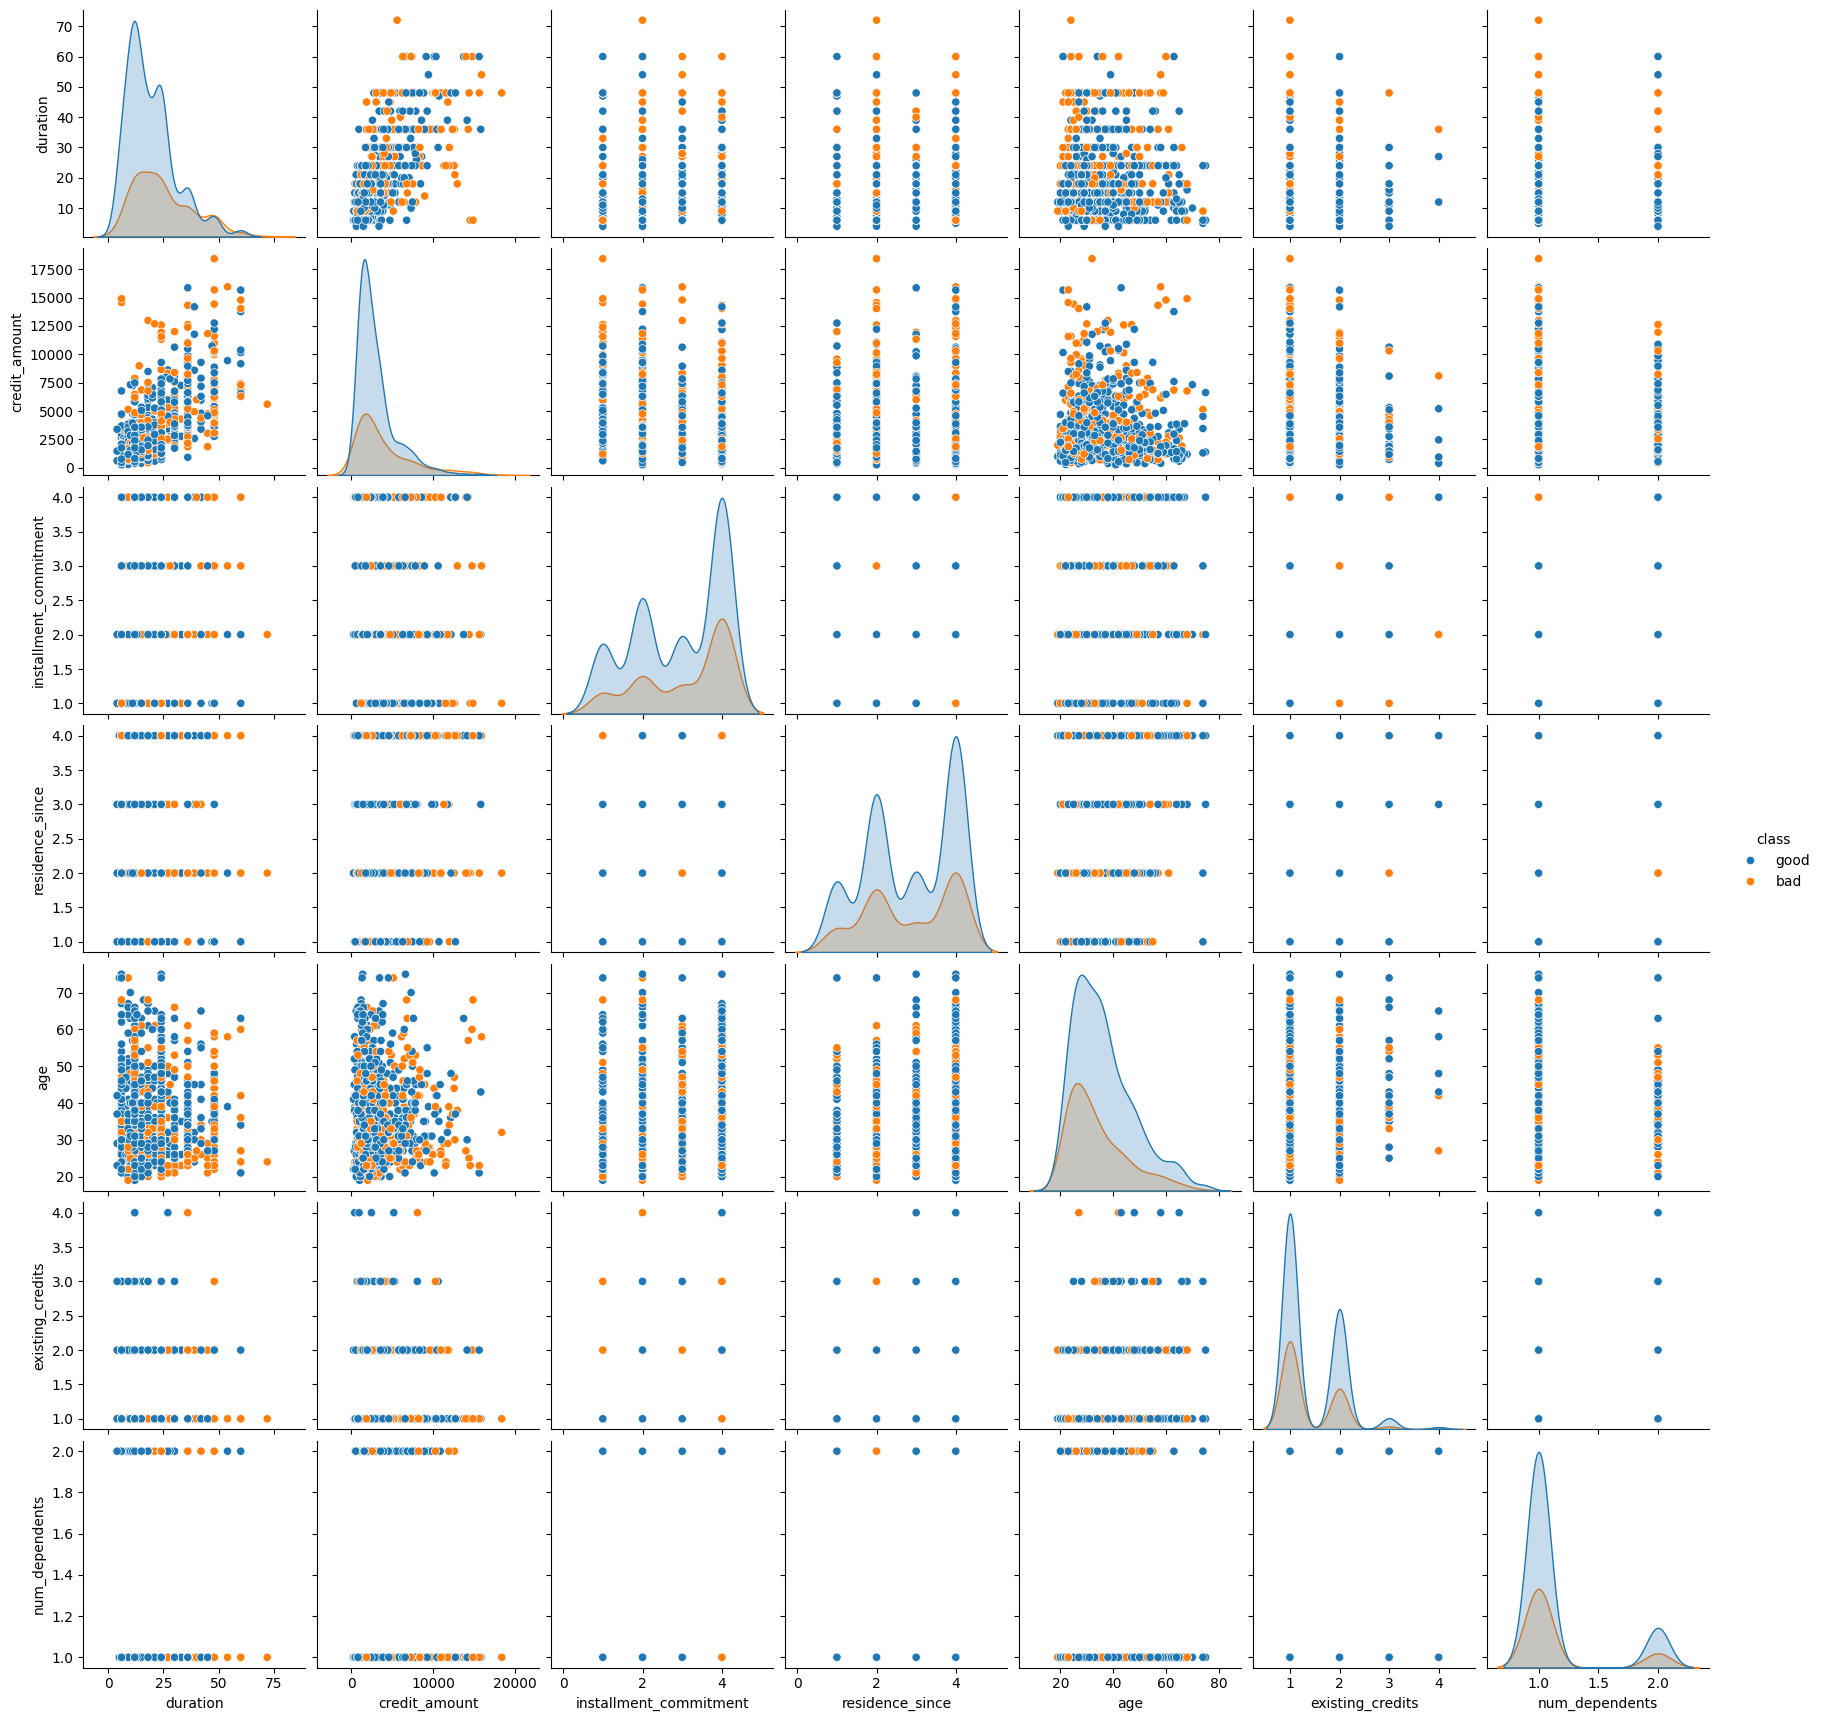

In [15]:
# Pair plot  # #Explore Numeric Features:
sns.pairplot(data, hue='class')
plt.show()


## handeling missing values


In [16]:
data.shape

(1000, 21)

#### trying not to drop too much from the data because it has a low number of rows

In [17]:
data.isnull().sum()

checking_status           91
duration                   0
credit_history            39
purpose                   43
credit_amount              0
savings_status            13
employment                13
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude        58
age                        0
other_payment_plans        0
housing                   69
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
class                      0
dtype: int64

In [18]:
data["checking_status"].value_counts()

checking_status
no checking    361
<0             250
0<=X<200       240
>=200           58
Name: count, dtype: int64

In [19]:
data["checking_status"].fillna("no checking",inplace=True)

### impute the Nans in checking status with no cheching value

In [20]:
data.isnull().sum()

checking_status            0
duration                   0
credit_history            39
purpose                   43
credit_amount              0
savings_status            13
employment                13
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude        58
age                        0
other_payment_plans        0
housing                   69
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
class                      0
dtype: int64

In [21]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [22]:
data[data["credit_history"].isnull()]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
101,0<=X<200,36,NaN,radio/tv,2323,<100,4<=X<7,4,male single,none,...,car,24,none,rent,1,skilled,1,none,yes,good
102,no checking,6,NaN,radio/tv,932,<100,1<=X<4,3,female div/dep/mar,none,...,real estate,24,none,own,1,skilled,1,none,yes,good
103,0<=X<200,9,NaN,furniture/equipment,1919,<100,4<=X<7,4,male single,none,...,car,35,none,rent,1,skilled,1,yes,yes,good
104,no checking,12,NaN,used car,2445,no known savings,<1,2,male mar/wid,none,...,car,26,none,rent,1,skilled,1,yes,yes,good
129,<0,12,NaN,new car,3499,<100,1<=X<4,3,female div/dep/mar,co applicant,...,real estate,29,none,own,2,skilled,1,none,yes,bad
130,0<=X<200,48,NaN,new car,8487,no known savings,4<=X<7,1,female div/dep/mar,none,...,car,24,none,own,1,skilled,1,none,yes,good
131,<0,36,NaN,education,6887,<100,1<=X<4,4,male single,none,...,life insurance,29,stores,own,1,skilled,1,yes,yes,bad
132,no checking,15,NaN,furniture/equipment,2708,<100,<1,2,male single,none,...,life insurance,27,bank,own,2,unskilled resident,1,none,yes,good
133,no checking,18,NaN,furniture/equipment,1984,<100,1<=X<4,4,male single,none,...,no known property,47,bank,for free,2,skilled,1,none,yes,good
134,no checking,60,NaN,radio/tv,10144,100<=X<500,4<=X<7,2,female div/dep/mar,none,...,real estate,21,none,own,1,skilled,1,yes,yes,good


In [23]:
data["credit_history"].value_counts()

credit_history
existing paid                     511
critical/other existing credit    280
delayed previously                 83
all paid                           48
no credits/all paid                39
Name: count, dtype: int64

In [24]:
data["credit_history"].fillna("existing paid",inplace=True)

### imputing the Nans with thw most frequent value = existing paid

In [25]:
data.isnull().sum()

checking_status            0
duration                   0
credit_history             0
purpose                   43
credit_amount              0
savings_status            13
employment                13
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude        58
age                        0
other_payment_plans        0
housing                   69
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
class                      0
dtype: int64

In [26]:
data.purpose.value_counts()

purpose
radio/tv               273
new car                220
furniture/equipment    171
used car                97
business                93
education               49
repairs                 21
domestic appliance      12
other                   12
retraining               9
Name: count, dtype: int64

In [27]:
data["purpose"].fillna("other",inplace=True)

#### imputing the Nans with "other" value

In [28]:
data.isnull().sum()


checking_status            0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings_status            13
employment                13
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude        58
age                        0
other_payment_plans        0
housing                   69
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
class                      0
dtype: int64

In [29]:
data["savings_status"].value_counts()

savings_status
<100                591
no known savings    183
100<=X<500          103
500<=X<1000          62
>=1000               48
Name: count, dtype: int64

In [30]:
data["savings_status"].fillna("no known savings", inplace=True)

#### imputing the Nans with "no known saving" value


In [31]:
data.isnull().sum()


checking_status            0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings_status             0
employment                13
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude        58
age                        0
other_payment_plans        0
housing                   69
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
class                      0
dtype: int64

In [32]:
data["employment"].value_counts()

employment
1<=X<4        337
>=7           244
4<=X<7        174
<1            170
unemployed     62
Name: count, dtype: int64

In [33]:
data["property_magnitude"].value_counts()

property_magnitude
car                  312
real estate          263
life insurance       222
no known property    145
Name: count, dtype: int64

In [34]:
data["property_magnitude"].fillna("no known property",inplace=True)

#### imputing the Nans with "no known property" value

In [35]:
data.isnull().sum()

checking_status            0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings_status             0
employment                13
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude         0
age                        0
other_payment_plans        0
housing                   69
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
class                      0
dtype: int64

In [36]:
data["housing"].value_counts()

housing
own         668
rent        164
for free     99
Name: count, dtype: int64

In [37]:
data["housing"].fillna("own",inplace=True)

### imputing the Nans with the most frequent value ="own"

In [38]:
data.dropna(inplace=True)

### droping the Nans in the employment column

In [39]:
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

## outliers


In [40]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,20.854103,3269.652482,2.974671,2.834853,35.513678,1.408308,1.152989
std,12.040457,2829.792151,1.118880,1.105069,11.378183,0.578916,0.360159
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1368.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2315.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3969.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


##### notice that the min in the credit_amount column is 250 and the median is 2315  while the max is 18424, this means that it has outliers

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'duration'),
  Text(1, 0, 'credit_amount'),
  Text(2, 0, 'installment_commitment'),
  Text(3, 0, 'residence_since'),
  Text(4, 0, 'age'),
  Text(5, 0, 'existing_credits'),
  Text(6, 0, 'num_dependents')])

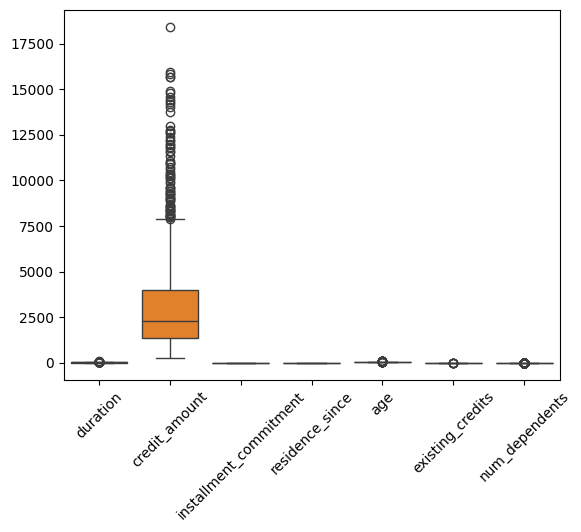

In [41]:
sns.boxplot(data)
plt.xticks(rotation=45)

#### notice having values greater than the max in credit_amount column that are considered outliers

<Axes: xlabel='credit_amount', ylabel='Count'>

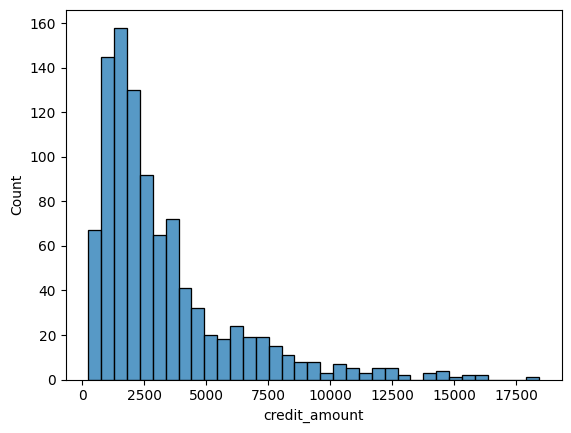

In [42]:
sns.histplot(data["credit_amount"])

### removing outliers in credit_amount column with IQR method

In [43]:
Q1 = data['credit_amount'].quantile(0.25)
Q3 = data['credit_amount'].quantile(0.75)

IQR = Q3 - Q1
threshold = 1.5

outliers_mask = ((data['credit_amount']< Q1 - threshold * IQR) | (data['credit_amount']> Q3 + threshold * IQR))

data = data[~outliers_mask]


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'duration'),
  Text(1, 0, 'credit_amount'),
  Text(2, 0, 'installment_commitment'),
  Text(3, 0, 'residence_since'),
  Text(4, 0, 'age'),
  Text(5, 0, 'existing_credits'),
  Text(6, 0, 'num_dependents')])

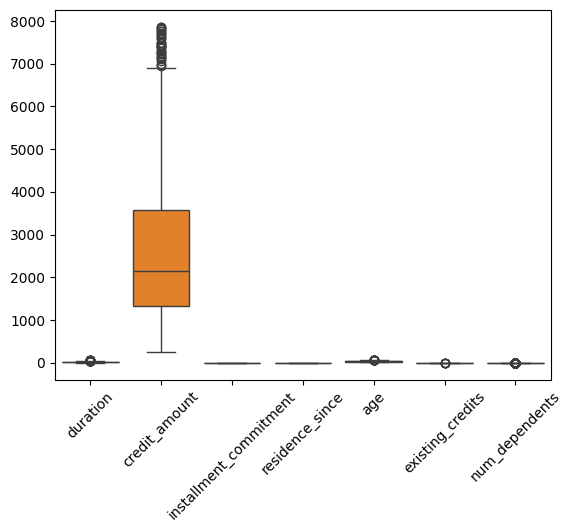

In [44]:
sns.boxplot(data)
plt.xticks(rotation=45)

### umbalanced


In [45]:
y = data["class"]
X= data.drop(["class"], axis=1)

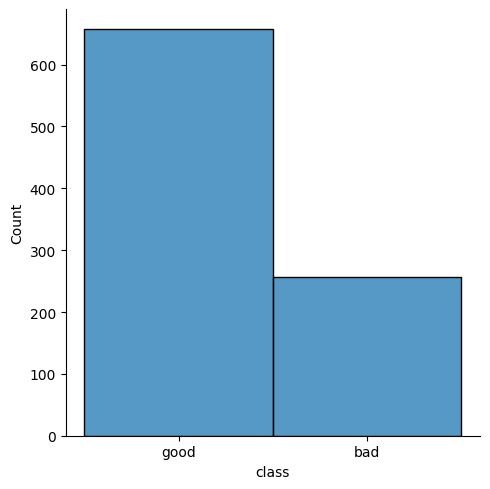

In [46]:
sns.displot(data["class"])

##### the two classes are umbalanced, i prefer the over sampling method in the bad class as we have small data 

In [47]:
# ! pip install imblearn

In [48]:
from imblearn.over_sampling import RandomOverSampler 
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

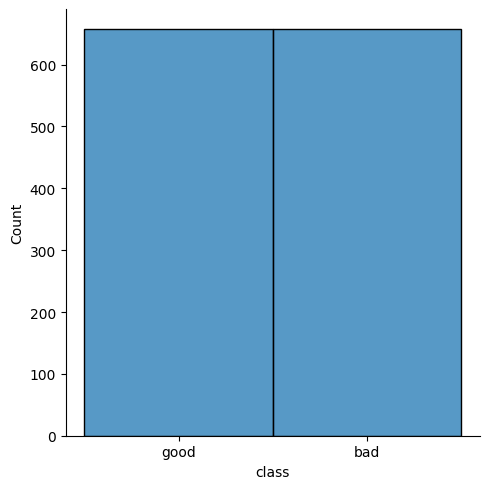

In [49]:
sns.displot(y_resampled)

In [50]:
X_resampled.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes
3,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes
4,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,none,4,life insurance,53,none,own,1,skilled,1,none,yes


## data transformation

In [51]:
# removed the categorical data 
x_before_normalization=X_resampled.drop(["checking_status","credit_history","purpose","savings_status","employment","personal_status","other_parties","property_magnitude","other_payment_plans","housing","job","own_telephone","foreign_worker"],axis=1)

In [52]:

from sklearn.preprocessing import StandardScaler
zscore_scaler = StandardScaler()


X_normalized = pd.DataFrame(zscore_scaler.fit_transform(x_before_normalization), columns=x_before_normalization.columns)


X_normalized.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,-1.281475,-0.828725,0.860398,1.050589,2.827955,1.092053,-0.436139
1,2.480935,1.804569,-0.966037,-0.737590,-1.122550,-0.679500,-0.436139
2,-0.743987,-0.318256,-0.966037,0.156500,1.247753,-0.679500,2.292846
3,0.330987,1.209297,-0.052819,1.050589,1.598909,1.092053,2.292846
4,0.330987,0.088688,-0.052819,1.050589,1.598909,-0.679500,-0.436139


In [53]:
X_resampled[X_normalized.columns]=X_normalized

In [54]:
X_resampled.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,-1.281475,critical/other existing credit,radio/tv,-0.828725,no known savings,>=7,0.860398,male single,none,1.050589,real estate,2.827955,none,own,1.092053,skilled,-0.436139,yes,yes
1,0<=X<200,2.480935,existing paid,radio/tv,1.804569,<100,1<=X<4,-0.966037,female div/dep/mar,none,-0.737590,real estate,-1.122550,none,own,-0.679500,skilled,-0.436139,none,yes
2,no checking,-0.743987,critical/other existing credit,education,-0.318256,<100,4<=X<7,-0.966037,male single,none,0.156500,real estate,1.247753,none,own,-0.679500,unskilled resident,2.292846,none,yes
3,<0,0.330987,delayed previously,new car,1.209297,<100,1<=X<4,-0.052819,male single,none,1.050589,no known property,1.598909,none,for free,1.092053,skilled,2.292846,none,yes
4,no checking,0.330987,existing paid,furniture/equipment,0.088688,500<=X<1000,>=7,-0.052819,male single,none,1.050589,life insurance,1.598909,none,own,-0.679500,skilled,-0.436139,none,yes


### convert categorical data into numeric data by label encoding

In [63]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_resampled["checking_status"] = label_encoder.fit_transform(X_resampled['checking_status'])
X_resampled["credit_history"] = label_encoder.fit_transform(X_resampled['credit_history'])
X_resampled["purpose"] = label_encoder.fit_transform(X_resampled['purpose'])
X_resampled["savings_status"] = label_encoder.fit_transform(X_resampled['savings_status'])
X_resampled["employment"] = label_encoder.fit_transform(X_resampled['employment'])
X_resampled["personal_status"] = label_encoder.fit_transform(X_resampled['personal_status'])
X_resampled["other_parties"] = label_encoder.fit_transform(X_resampled['other_parties'])
X_resampled["property_magnitude"] = label_encoder.fit_transform(X_resampled['property_magnitude'])
X_resampled["other_payment_plans"] = label_encoder.fit_transform(X_resampled['property_magnitude'])
X_resampled["housing"] = label_encoder.fit_transform(X_resampled['property_magnitude'])
X_resampled["own_telephone"] = label_encoder.fit_transform(X_resampled['own_telephone'])
X_resampled["foreign_worker"] = label_encoder.fit_transform(X_resampled['foreign_worker'])
X_resampled["job"] = label_encoder.fit_transform(X_resampled['job'])

y=label_encoder.fit_transform(y)






In [64]:
X_resampled

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,1,-1.281475,1,6,-0.828725,4,3,0.860398,3,2,1.050589,3,2.827955,3,3,1.092053,1,-0.436139,1,1
1,0,2.480935,3,6,1.804569,2,0,-0.966037,0,2,-0.737590,3,-1.122550,3,3,-0.679500,1,-0.436139,0,1
2,3,-0.743987,1,2,-0.318256,2,1,-0.966037,3,2,0.156500,3,1.247753,3,3,-0.679500,3,2.292846,0,1
3,1,0.330987,2,4,1.209297,2,0,-0.052819,3,2,1.050589,2,1.598909,2,2,1.092053,1,2.292846,0,1
4,3,0.330987,3,3,0.088688,1,3,-0.052819,3,2,1.050589,1,1.598909,1,1,-0.679500,1,-0.436139,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,1,-0.743987,4,6,1.941135,2,0,0.860398,3,2,-0.737590,1,-0.595816,1,1,1.092053,1,-0.436139,1,1
1310,1,-0.743987,4,4,-0.876633,2,0,0.860398,3,2,1.050589,0,1.159964,0,0,1.092053,1,-0.436139,0,1
1311,0,-0.743987,4,3,0.162477,2,2,0.860398,0,2,0.156500,1,-0.859183,1,1,1.092053,1,-0.436139,0,1
1312,3,0.330987,3,6,1.800164,4,2,-1.879254,0,2,-1.631679,0,0.808808,0,0,1.092053,1,-0.436139,1,1


In [65]:
y

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

### measuring correlation after connverting all categorical data into numerical values

In [72]:
ddata=pd.concat([X_resampled,pd.DataFrame(y,columns=["class"])],axis=1)

In [73]:
ddata

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,-1.281475,1,6,-0.828725,4,3,0.860398,3,2,...,3,2.827955,3,3,1.092053,1,-0.436139,1,1,1.0
1,0,2.480935,3,6,1.804569,2,0,-0.966037,0,2,...,3,-1.122550,3,3,-0.679500,1,-0.436139,0,1,0.0
2,3,-0.743987,1,2,-0.318256,2,1,-0.966037,3,2,...,3,1.247753,3,3,-0.679500,3,2.292846,0,1,1.0
3,1,0.330987,2,4,1.209297,2,0,-0.052819,3,2,...,2,1.598909,2,2,1.092053,1,2.292846,0,1,0.0
4,3,0.330987,3,3,0.088688,1,3,-0.052819,3,2,...,1,1.598909,1,1,-0.679500,1,-0.436139,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,1,-0.743987,4,6,1.941135,2,0,0.860398,3,2,...,1,-0.595816,1,1,1.092053,1,-0.436139,1,1,NaN
1310,1,-0.743987,4,4,-0.876633,2,0,0.860398,3,2,...,0,1.159964,0,0,1.092053,1,-0.436139,0,1,NaN
1311,0,-0.743987,4,3,0.162477,2,2,0.860398,0,2,...,1,-0.859183,1,1,1.092053,1,-0.436139,0,1,NaN
1312,3,0.330987,3,6,1.800164,4,2,-1.879254,0,2,...,0,0.808808,0,0,1.092053,1,-0.436139,1,1,NaN


In [74]:
ddata.corr()["class"].sort_values()

duration                 -0.213056
installment_commitment   -0.109404
foreign_worker           -0.099440
credit_history           -0.071991
credit_amount            -0.044015
num_dependents           -0.004288
employment               -0.003057
job                       0.002121
residence_since           0.003048
other_parties             0.022120
existing_credits          0.054182
property_magnitude        0.055498
other_payment_plans       0.055498
housing                   0.055498
own_telephone             0.085384
savings_status            0.101049
age                       0.102211
personal_status           0.103532
purpose                   0.137243
checking_status           0.239010
class                     1.000000
Name: class, dtype: float64

##### checking status is the most important feature
##### purpose ,personal_status,age ,savings_status has less affect on the target
##### own_telephone, housing,other_payment_plans,property_magnitude,existing_credits and the rest has no affect on the target